# <font color='brown'><center>Multiple Linear Regression in Python


## <font color='blue'>Housing Case Study

#### Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —


- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.

**So interpretation is important!**

__The steps we will follow in this exercise are as follows:__
1. [Reading, Understanding and visualising the data](#Step-1:-Reading-and-Understanding-the-Data)
2. [Preparing the data for modelling (train-test split, rescalling etc.)](#Step-3:-Data-Preparation)
3. [Traning the model](#Step-5:-Building-a-linear-model)
4. [Residual Analysis](#Step-7:-Residual-Analysis-of-the-train-data)
5. [Predictions and evaluation on the test set](#Step-8:-Making-Predictions-Using-the-Final-Model)

---
## <font color = 'blue'>Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing the numpy and pandas libreary

import numpy as np
import pandas as pd

In [3]:
# Reading the Housing the data

housing = pd.read_csv("Housing.csv")

In [4]:
# Check the top 5 rows of the dataset

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### <font color='blue'>Inspect the various aspects of the housing dataframe

In [5]:
# check the shape of the dataset

housing.shape

(545, 13)

The housing dataset has 545 rows and 13 columns

In [6]:
# check the info() of dataset

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


There is no **Null Values** in the dataset

In [7]:
# Chek the numerical summary of the dataset

housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## <font color='blue'>Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [8]:
# importing matplotlib and seabort librearies

import matplotlib.pyplot as plt
import seaborn as sns

### <font color='blue'>Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

In [9]:
# Getting the numarical column list

list(housing.describe().columns)

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

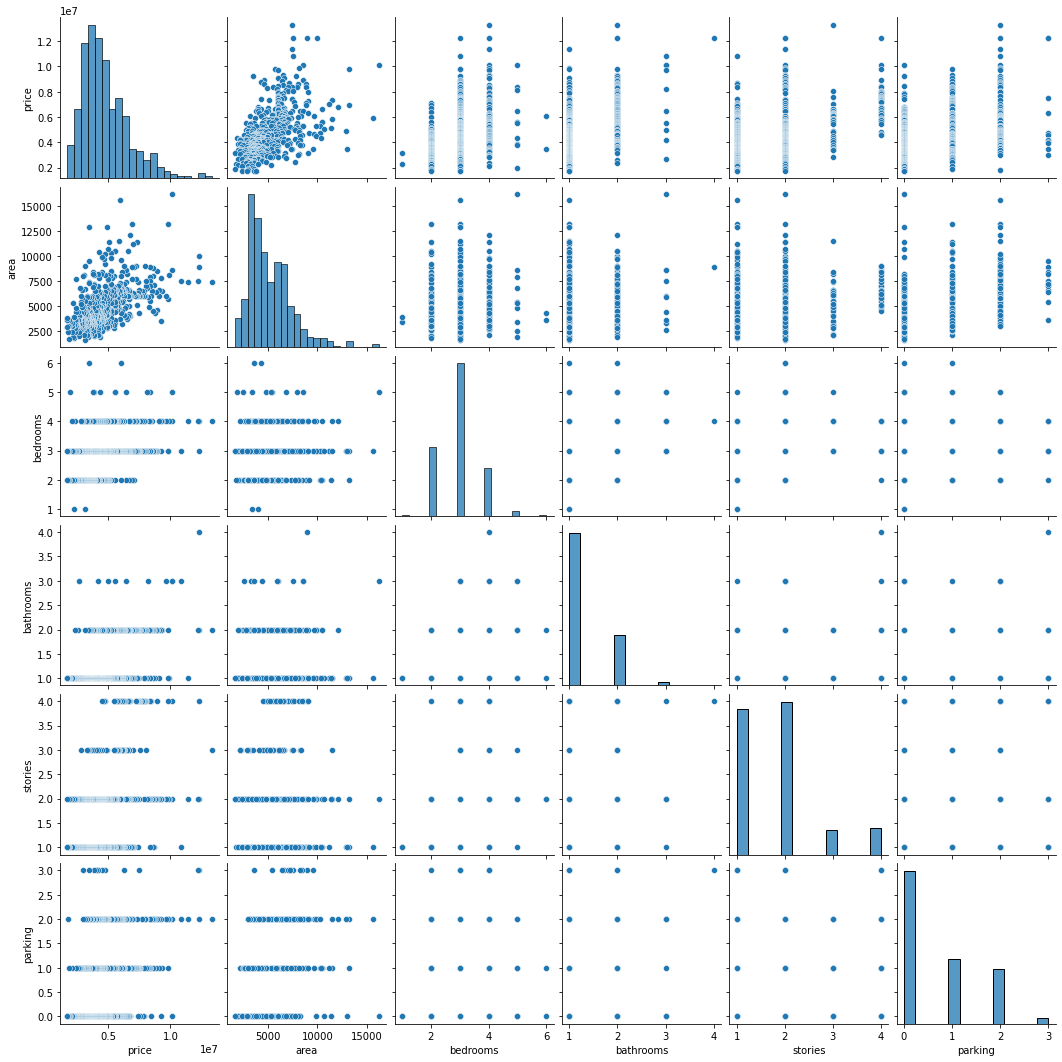

In [10]:
# Plotting pair plot 

sns.pairplot(housing);

- There is a postive correlation between `area` and `price`, which means some of the varience in `price` explained by `area`.
- Except 6 and 5 bedrooms, `price` increasing if `bedrooms` increases.
- Similarly No. of `bathroom` increses `price` also increasing.
- So Linear Regression Model can be built
<br><br>

### <font color='blue'>Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

In [11]:
# Getting the categorical column list

list(set(housing.columns) - set(housing.describe().columns))

['guestroom',
 'basement',
 'airconditioning',
 'prefarea',
 'hotwaterheating',
 'mainroad',
 'furnishingstatus']

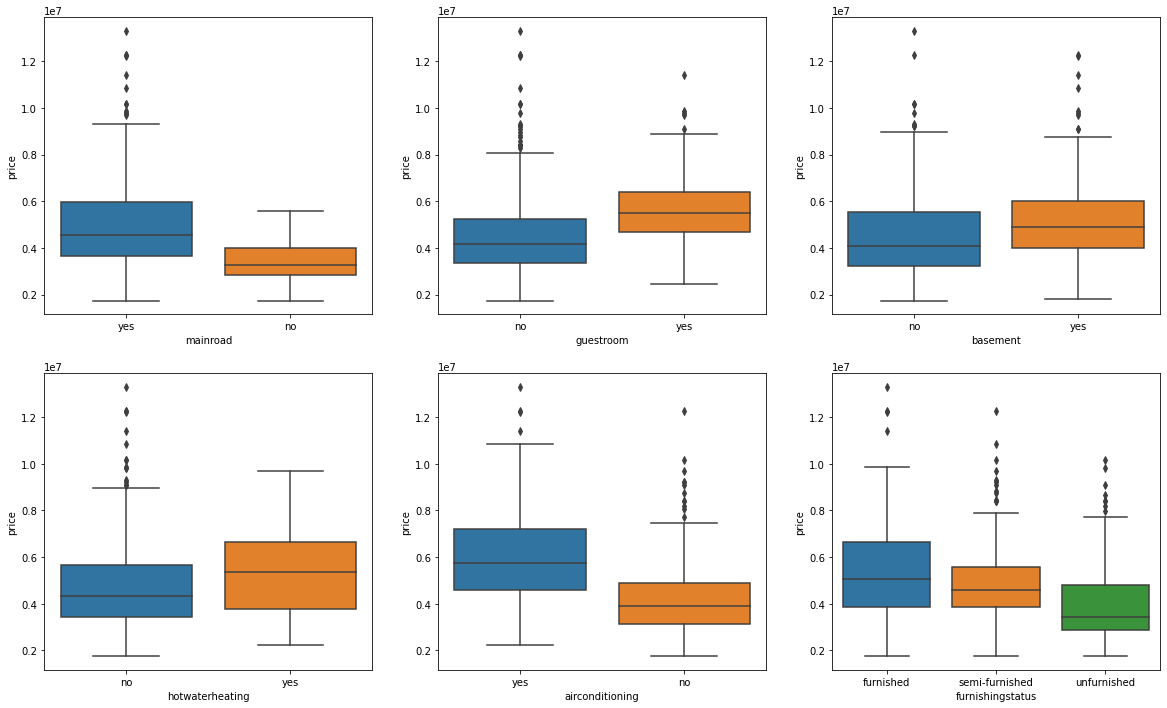

In [12]:
# Plotting box plot for the categorical variable using subplot

plt.figure(figsize=[20,12])

plt.subplot(2,3,1)
sns.boxplot(housing.mainroad,housing.price)

plt.subplot(2,3,2)
sns.boxplot(housing.guestroom,housing.price)

plt.subplot(2,3,3)
sns.boxplot(housing.basement,housing.price)

plt.subplot(2,3,4)
sns.boxplot(housing.hotwaterheating,housing.price)

plt.subplot(2,3,5)
sns.boxplot(housing.airconditioning,housing.price)

plt.subplot(2,3,6)
sns.boxplot(housing.furnishingstatus,housing.price);


We can also visualise some of these categorical features parallely by using the `hue` argument. Below is the plot for `furnishingstatus` with `airconditioning` as the hue.

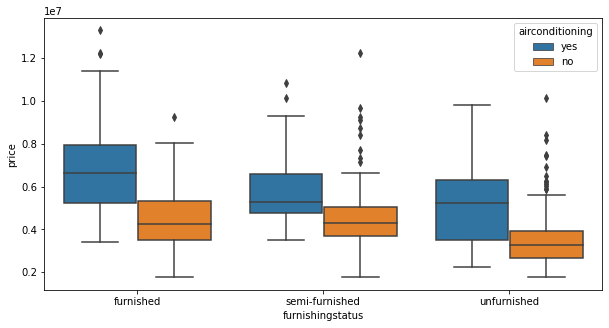

In [13]:
plt.figure(figsize=[10,5])
sns.boxplot(housing.furnishingstatus,housing.price,hue=housing.airconditioning);

### <font color='blue'>MCQ's

#### <font color = 'blue'>Question_1:
**Interpreting Box Plots**<br><br>
You obtained the following box plot from the notebook:

    
<div>
<img src="https://images.upgrad.com/23508101-06f3-4801-8708-f1bdc0110231-linear1.PNG" width='600'>
</div>
   
    
What can you say, from the figure above, about the median of the category ‘semi-furnished with airconditioning’?
    
    
- It lies between 0.8 and 1.0
- It lies between 0.6 and 0.8
- It lies between 0.4 and 0.6
- It lies between 0.2 and 0.4

    

#### <font color = 'blue'>Answer:
**It lies between 0.4 and 0.6** 
    
The category 'semi-furnished with airconditioning' is the third box plot from the left. Recall what the different lines mean in a boxplot. The upper and lower tails represent the maximum and minimum values. The lower and upper boundary of the box represent the 1st and 3rd quartile respectively, and the line inside the box represents the median. As you can see, for the category - 'semi-furnished with airconditioning', the median lies between 0.4 and 0.6

---
## <font color = 'blue'>Step 3: Data Preparation

- You can see that your dataset has many columns with values as 'Yes' or 'No'.

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

**Encoding:**<br>
- Converting binary variables to 1/0
- Other categorical variables to dummy variables

In [14]:
# Getting categorical columns

list(set(housing.columns) - set(housing.describe()))

['guestroom',
 'basement',
 'airconditioning',
 'prefarea',
 'hotwaterheating',
 'mainroad',
 'furnishingstatus']

In [15]:
# Taking only binary categorical variables (yes/no)

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

If you noticed `furnishingstatus` has 3 levels, so we will convert it in to dummy variables

In [16]:
# # Methiod_1: Changine the binary variable 'yes' and 'no' to '1' and '0'
# # List of variables to map

# varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# # Defining the map function
# def binary_map(x):
#     return x.map({'yes': 1, "no": 0})

# # Applying the function to the housing list
# housing[varlist] = housing[varlist].apply(binary_map)

In [17]:
# Methiod_2: Changine the binary variable 'yes' and 'no' to '1' and '0'

housing[varlist] = housing[varlist].apply(lambda x: x.map({'yes':1,"no":0}))
housing[varlist]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0
...,...,...,...,...,...,...
540,1,0,1,0,0,0
541,0,0,0,0,0,0
542,1,0,0,0,0,0
543,0,0,0,0,0,0


In [18]:
# Check the housing dataframe now

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [19]:
# This is for coding question output format table to be aligned in leftside

from IPython.core.display import HTML
table_css = 'table {align:left;display:block} '
HTML('<style>{}</style>'.format(table_css))

### <font color = 'blue'> Coding Question

#### <font color = 'blue'>Question_1:
__Mapping Variables__<br><br>
__Description__<br>
You're given two lists, the first of which contains the name of some people and the second contains their corresponding 'response'. These lists have been converted to a dataframe.
Now, the values that the 'response' variable can take are ‘Yes’, ‘No’, and ‘Maybe’. Write a code to map these variables to the values ‘1.0’, ‘0.0’, and ‘0.5’.

Note: It also might happen the the first letter of the three responses are not in uppercase, i.e. you might also have the values 'yes', 'no', and 'maybe' in the dataframe. So make sure you handle that in your code.

Example:<br><br>
__Input 1:__<br>
['Reetesh', 'Shruti', 'Kaustubh', 'Vikas', 'Mahima', 'Akshay']<br>
['No', 'Maybe', 'yes', 'Yes', 'maybe', 'Yes']<br><br>
__Output 1:__

<style> 
table td, table th, table tr {text-align:left !important;}
</style>
    
|Name|Response|
|:----|:------| 
|Reetesh|0.0| 
|Shruti|0.5|
|Kaustubh|1.0|
|Vikas|1.0|
|Mahima|0.5|
|Akshay|1.0|

#### <font color='blue'> Solution:

In [21]:
# Reading the input
import ast 
input_list = ast.literal_eval(input())

# Storing the names in a variable 'name'
name = input_list[0]

# Storing the responses in a variable 'repsonse'
response = input_list[1]

# Importing pandas and converting the read lists to a dataframe. You can print
# the dataframe and run the code to see what it will look like
import pandas as pd 
df = pd.DataFrame({'Name': name,'Response': response})

# Write your code here
# Note: map() function will work in data frame only to convert series to data frame use [[]] for eg. use df[['column1']]
#       instesd of df['column1']

df[['Response']] = df[['Response']].apply(lambda x: x.map({'yes':1,"no":0,"maybe":0.5,"Yes":1,"No":0,"Maybe":0.5}))

# Print the final DataFrame
print(df)

# For input:
# [['Reetesh', 'Shruti', 'Kaustubh', 'Vikas', 'Mahima', 'Akshay'],['No', 'Maybe', 'yes', 'Yes', 'maybe', 'Yes']]

[['Reetesh', 'Shruti', 'Kaustubh', 'Vikas', 'Mahima', 'Akshay'],['No', 'Maybe', 'yes', 'Yes', 'maybe', 'Yes']]
       Name  Response
0   Reetesh       0.0
1    Shruti       0.5
2  Kaustubh       1.0
3     Vikas       1.0
4    Mahima       0.5
5    Akshay       1.0


### <font color='blue'>Creating Dummy Variables

The variable `furnishingstatus` has three levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [22]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'

status = pd.get_dummies(housing.furnishingstatus)

In [23]:
# Check what the dataset 'status' looks like

status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


Now, you don't need three columns. You can drop the `furnished` column, as the type of furnishing can be identified with just the last two columns where — 
- `00` will correspond to `furnished`
- `01` will correspond to `unfurnished`
- `10` will correspond to `semi-furnished`

In [24]:
# Let's drop the first column from status df using 'drop_first = True'

status = pd.get_dummies(housing.furnishingstatus,drop_first=True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [25]:
# Add the results to the original housing dataframe

housing = pd.concat([housing,status],axis=1) # axis=1; concat horizontally

In [26]:
# Now let's see the head of our dataframe.

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [27]:
# Drop 'furnishingstatus' as we have created the dummies for it

housing.drop('furnishingstatus', axis = 1, inplace = True)

In [28]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


### <font Color='blue'>MCQ's

#### <font color = 'blue'>Question_1:
**Mapping Variables**<br><br>
After you performed binary encoding of the variable ‘MaritalStatus’ with, ‘Married’ corresponding to 1 and ‘Unmarried’ corresponding to 0, you found out that the mean of the variable ‘MaritalStatus’ was 0.6. What does this statement indicate?
   
    
- 40% of the people on the list are married.
- 60% of the people on the list are married.
- Can’t say on the basis of this data.
    

#### <font color = 'blue'>Answer:
**60% of the people on the list are married.** 
    
Notice that when you perform a binary encoding, the only values present in the variable are 0 and 1. So if you calculate the mean, it is only the 1s which will contribute towards it. Since the value '1' corresponds to 'Married', a mean of 0.6 indicates that 60% of the people in the list are married.

#### <font color = 'blue'>Question_2:
**Encoding Variables**<br><br>
Suppose you performed encoding with the variable ‘BloodGroup’ having four levels, ‘A’, ‘B’, ‘AB’, and ‘O’. To perform the encoding, you wish to drop two of the levels, ‘AB’ and ‘O’. Suggest a suitable encoding process that will now represent the four levels.


#### <font color = 'blue'>Answer:
A - 10<br>
B - 01<br>
AB - 11<br>
O - 00<br>
Note that this encoding is not exactly dummy encoding; it’s just manual encoding that you performed.

## <font color='blue'>Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [29]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [30]:
print(df_train.shape)
print(df_test.shape)

(381, 14)
(164, 14)


### <font color='blue'>Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for `area`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling (Normalisation) : Compress all the data between 0 and 1
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.


<br><br>
__Normilisation__:

$$ X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}} $$
<br>
__Standardisation__:
$$ z = \frac{x - \mu}{\sigma} $$
$\mu $ - mean <br>
$\sigma $ - Standard deviation  <br>
$X$ - Data point

    
    
**Note:**In genreal MinMax scaling is advisable because Standardisation will get affected by outliers 
    
**Visualising the Normalisation and Standardisation**
<div>
<img src="https://sebastianraschka.com/images/blog/2014/about_standardization_normalization/about_standardization_normalization_44_0.png" width='500'>
</div>

[Refer this blog for more info](https://sebastianraschka.com/Articles/2014_about_feature_scaling.html)

In [31]:
# Importing Normalisation using scikit learn package from preprocessing libreary

from sklearn.preprocessing import MinMaxScaler

#### Steps:
- Instantiaite an objecet
- Fit on data

In [32]:
scaler = MinMaxScaler()

In [33]:
# Apply scaler() to all the numerical columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

# scaler.fit() - learns Xmin, Xmax
# scalar.transform() - (x - xmin)/(xmax - xmin)
# scalar.fit_transfor() - does both

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [34]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [35]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.233596,0.414698,0.325459
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.423674,0.493318,0.469162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


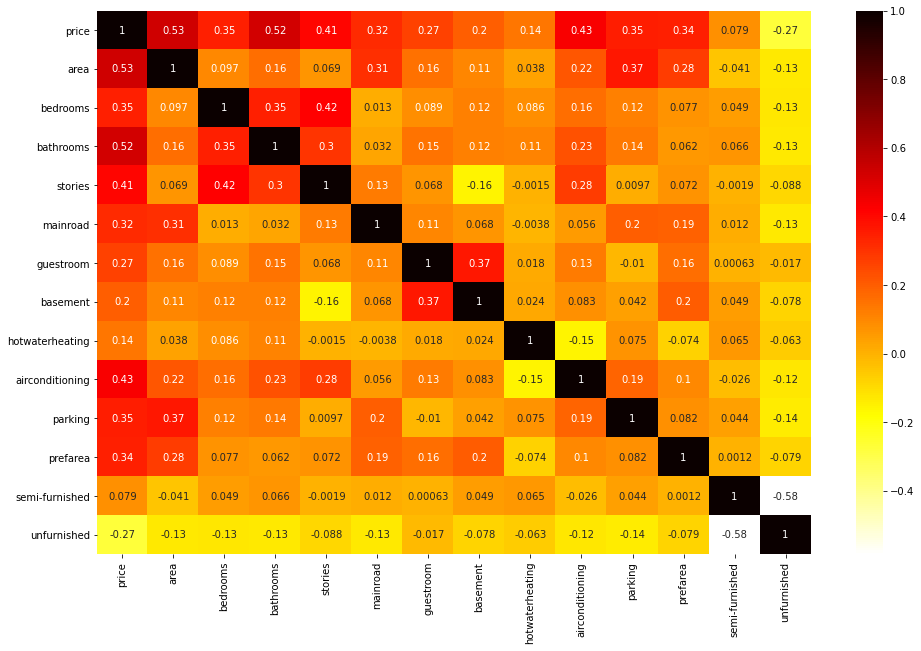

In [36]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="hot_r")
plt.show()

As you might have noticed, `area` seems to the correlated to `price` the most. Let's see a pairplot for `area` vs `price`.

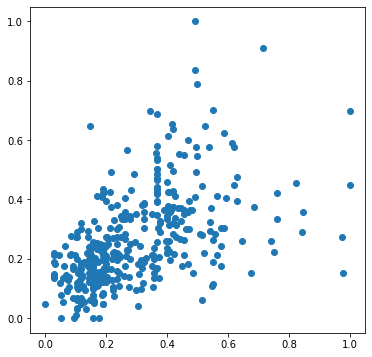

In [37]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.area, df_train.price)
plt.show()

So, we pick `area` as the first variable and we'll try to fit a regression line to that.

### <font color='blue'>Dividing into X and Y sets for the model building

In [38]:
y_train = df_train.pop('price')
X_train = df_train

In [39]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [40]:
y_train.head()

359    0.169697
19     0.615152
159    0.321212
35     0.548133
28     0.575758
Name: price, dtype: float64

---
## <font color='blue'>Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [41]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['area']])

# Create a first fitted model
lr = sm.OLS(y_train,X_train_lm).fit()

In [42]:
# Check the parameters obtained

lr.params

const    0.126894
area     0.462192
dtype: float64

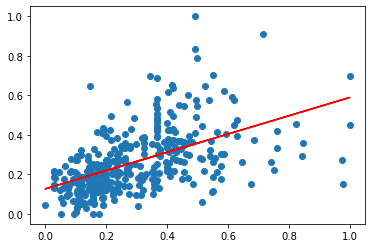

In [43]:
# Let's visualise the data with a scatter plot and the fitted regression line

plt.scatter(X_train_lm.area,y_train)
plt.plot(X_train_lm.area,lr.params[0] + lr.params[1]*X_train.area,'r');

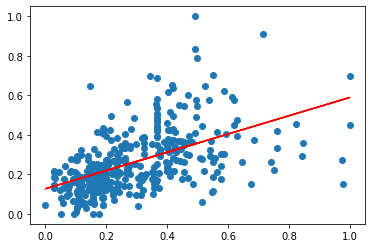

In [44]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.127 + 0.462*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [45]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Fri, 22 Oct 2021   Prob (F-statistic):           3.15e-29
Time:                        12:19:02   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.0

### <font color='blue'>Adding another variable

The R-squared value obtained is `0.283`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. `bathrooms`.

In [46]:
X_train_lm.head()

,const,area
359,1.0,0.155227
19,1.0,0.403379
159,1.0,0.115628
35,1.0,0.454417
28,1.0,0.538015


In [47]:
# Assign all the feature variables to X
X_train_lm = X_train[['area','bathrooms']]

In [48]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const        0.104589
area         0.398396
bathrooms    0.298374
dtype: float64

In [49]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Fri, 22 Oct 2021   Prob (F-statistic):           2.51e-54
Time:                        12:19:09   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.0

We have clearly improved the model as the value of adjusted R-squared as its value has gone up to `0.477` from `0.281`.
Let's go ahead and add another variable, `bedrooms`.

In [50]:
# Assign all the feature variables to X
X_train_lm = X_train[['area', 'bathrooms','bedrooms']]

In [51]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const        0.041352
area         0.392211
bathrooms    0.259978
bedrooms     0.181863
dtype: float64

In [52]:
# Print the summary of the model

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     128.2
Date:                Fri, 22 Oct 2021   Prob (F-statistic):           3.12e-57
Time:                        12:19:16   Log-Likelihood:                 297.76
No. Observations:                 381   AIC:                            -587.5
Df Residuals:                     377   BIC:                            -571.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.018      2.292      0.0

Even though **`area`** is the most correlated variable, it could explain only **28%** of the variance. After that, we added **`bathroom`** as it had the second-highest correlation with the target variable. Then the model was able to explain **50%** of the variance. 

In [53]:
# Adding the 'airconditioning' variable
X_train_lm = X_train[['area', 'bathrooms','bedrooms','airconditioning']]

# Build a linear model
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train,X_train_lm).fit()

# Priniting the model parameters
lr.params

const              0.039668
area               0.354583
bathrooms          0.232922
bedrooms           0.159799
airconditioning    0.082766
dtype: float64

In [54]:
# Printing the model summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     118.5
Date:                Fri, 22 Oct 2021   Prob (F-statistic):           2.77e-65
Time:                        12:19:22   Log-Likelihood:                 319.19
No. Observations:                 381   AIC:                            -628.4
Df Residuals:                     376   BIC:                            -608.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0397      0.017     

We have improved the adjusted R-squared again. Now let's go ahead and add all the feature variables.

### <font color='blue'>Adding all the variables to the model
    
The bottom-up approach was just to give you an idea of how the parameters change when the number of variables is increased. More generally, you first build a model using all  and then try to improve the model by dropping some of them.

In [55]:
# Check all the columns of the dataframe

housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [56]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const              0.020033
area               0.234664
bedrooms           0.046735
bathrooms          0.190823
stories            0.108516
mainroad           0.050441
guestroom          0.030428
basement           0.021595
hotwaterheating    0.084863
airconditioning    0.066881
parking            0.060735
prefarea           0.059428
semi-furnished     0.000921
unfurnished       -0.031006
dtype: float64

In [57]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Fri, 22 Oct 2021   Prob (F-statistic):           8.83e-83
Time:                        12:19:27   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021     

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

let say,if 

$VIF = 5 = \frac{1}{1-R^2}$

then $1-R^2 = 0.2$

$R^2 = 0.8$

**Imagine if you build a model `bedroom` as the target and all the other varibles as the predictors you will get an $R^2$ of 0.8, which means 80% of variance in `bedroom` is explained by all the other variables, this is how bedroom is correlating with other  predictor variables**

**<font color='brown'>Note:Anything, which have VIF of 5 or more than 5 is having very high correlation with other variables**

In [58]:
# Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False,ignore_index=True)
vif

,Features,VIF
0,bedrooms,7.33
1,mainroad,6.02
2,area,4.67
3,stories,2.70
4,semi-furnished,2.19
5,parking,2.12
6,basement,2.02
7,unfurnished,1.82
8,airconditioning,1.77
9,bathrooms,1.67


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

#### <font color='blue'>We could have:
- High p-value, High VIF - Remove
- High-Low
    - High p, Low VIF - Remove these first
    - Low p, High VIF - Remove these after the ones above
- Low p, Low VIF - Keep the variables

### <font color='blue'>Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `semi-furnished` as it has a very high p-value of `0.938`. Let's go ahead and drop this variables

In [60]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('semi-furnished', 1,)

In [61]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [62]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Fri, 22 Oct 2021   Prob (F-statistic):           1.07e-83
Time:                        12:19:43   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019     

In [63]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,bedrooms,6.59
4,mainroad,5.68
0,area,4.67
3,stories,2.69
9,parking,2.12
6,basement,2.01
8,airconditioning,1.77
2,bathrooms,1.67
10,prefarea,1.51
5,guestroom,1.47


### <font color='blue'>Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `bedroom` has a significantly high VIF (`6.6`) and a high p-value (`0.206`) as well. Hence, this variable isn't of much use and should be dropped.

In [64]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('bedrooms', 1)

In [65]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [66]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Fri, 22 Oct 2021   Prob (F-statistic):           2.73e-84
Time:                        12:19:51   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015     

In [67]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,mainroad,4.79
0,area,4.55
2,stories,2.23
8,parking,2.10
5,basement,1.87
7,airconditioning,1.76
1,bathrooms,1.61
9,prefarea,1.50
4,guestroom,1.46
10,unfurnished,1.33


### <font color='blue'>Dropping the variable and updating the model

As you might have noticed, dropping `semi-furnised` decreased the VIF of `mainroad` as well such that it is now under 5. But from the summary, we can still see some of them have a high p-value. `basement` for instance, has a p-value of 0.03. We should drop this variable as well.

In [68]:
X = X.drop('basement', 1)

In [69]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [70]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     77.18
Date:                Fri, 22 Oct 2021   Prob (F-statistic):           3.13e-84
Time:                        12:20:02   Log-Likelihood:                 378.51
No. Observations:                 381   AIC:                            -735.0
Df Residuals:                     370   BIC:                            -691.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0428      0.014     

In [71]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,mainroad,4.55
0,area,4.54
2,stories,2.12
7,parking,2.10
6,airconditioning,1.75
1,bathrooms,1.58
8,prefarea,1.47
9,unfurnished,1.33
4,guestroom,1.30
5,hotwaterheating,1.12


Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

### <font color='blue'>MCQ's

#### <font color = 'blue'>Question_1:
**Elimination based on VIF**<br><br>
Suppose the VIFs obtained for five different variables are as follows:
   
|||
|:--|:--|
|X1|7.12|
|X2|5.53|
|X3|5.01|
|X4|3.45|
|X5|2.68|
    
Assuming that you’re dropping variables only on the basis of VIF and a VIF > 5 is not acceptable, which of these variables will you definitely drop?
    
    
- X1
- X2
- X1 and X2
- X1, X2, and X3
    

#### <font color = 'blue'>Answer:
**X1** 
    
Correct. It is always advisable that you drop variables one by one. Now, this variable definitely has a high VIF and needs to be dropped. The other two variables X2 and X3 also have a VIF > 5, but it might happen that after you drop X1, their VIF values will drop. So never drop more than one variable at a time.

---
## <font color='blue'>Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [73]:
#Predicting the y_train

y_train_price = lr_4.predict(X_train_lm)

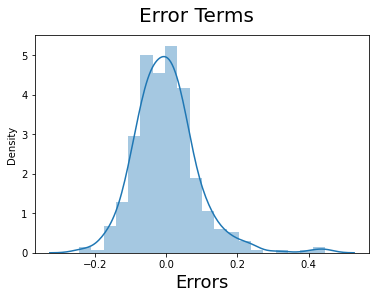

In [75]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18);                         # X-label

As you might have noticed the spread is centered around mean of 0, so we good to make predictions

---

## <font color='blue'>Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

While applying the scaling we have to use only **`transform`** instead of **`fit_tranfrom`** beacuse the test dataset is unseen by the model so the model has to predict the test dataset.
- **`fit_transform`** in training dataset
- only **`transform`** in test dataset

In [78]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.229697,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.484848,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.303030,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.242424,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.227879,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [79]:
df_test.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.263176,0.298548,0.408537,0.158537,0.268293,0.865854,0.195122,0.347561,0.030488,0.353659,0.205285,0.237805,0.420732,0.329268
std,0.172077,0.211922,0.147537,0.281081,0.276007,0.341853,0.397508,0.477654,0.172452,0.479569,0.289322,0.427043,0.495189,0.471387
min,0.006061,-0.016367,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142424,0.148011,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.226061,0.259724,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.346970,0.397439,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,0.909091,1.263992,0.800000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


If you see closely the min and max value is not exactly 0 and 1, because the scaler had learnt with the training dataset, for test dataset it just applied by transforming them

#### Dividing into X_test and y_test

In [80]:
y_test = df_test.pop('price')
X_test = df_test

In [81]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [82]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop(["bedrooms", "semi-furnished", "basement"], axis = 1)

In [83]:
# Making predictions using the fourth model

y_pred_m4 = lr_4.predict(X_test_m4)

In [84]:
# Model Evaluation

from sklearn.metrics import r2_score
r2_score(y_true=y_test,y_pred=y_pred_m4)

0.6601344030219642

## <font color='blue'>Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

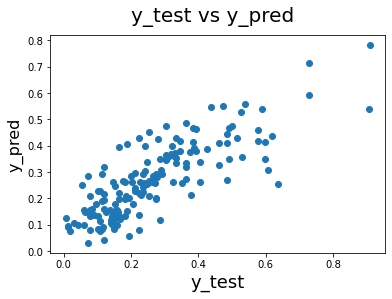

In [85]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16);      


We can see that the equation of our best fitted line is:

$ price = 0.236  \times  area + 0.202  \times  bathrooms + 0.11 \times stories + 0.05 \times mainroad + 0.04 \times guestroom + 0.0876 \times hotwaterheating + 0.0682 \times airconditioning + 0.0629 \times parking + 0.0637 \times prefarea - 0.0337 \times unfurnished $


Overall we have a decent model, but we also acknowledge that we could do better. 

We have a couple of options:
1. Add new features (bathrooms/bedrooms, area/stories, etc.)
2. Build a non-linear model

#### <font color = 'blue'>Question_1:
**Derived Variables**<br><br>
List four derived variables from the housing dataset that you think can be created in order to get a better model. (Note that this is subjective and adding a derived feature does not necessarily improve the model.)
    

#### <font color = 'blue'>Answer:
1. bathrooms/bedrooms<br>
2. area/stories<br>
3. parking/bedrooms<br>
4. area/bedrooms<br>

---

## <font color='blue'>Summary

- **MLR is extension to SLR**
    
    - **Unchanged**
        - Assumptions on residuals
        - Arriving at coefficients
        - Hypothesis testing framework

    - **New Considerations**
        - Interpretation of coefficients
        - Multicollinearity
        - Model complexity
        - Feature selection
    
    

- **Multicollinearity**
    - Is problematic for interpretation and inference
    
    
    
- **Detection**
    - correlations, VIF
    
    
- **Handling**
    - drop features, create new features, other methods (PCA, PLS etc.)
    
    
- **Model comparison**
    - Can't compare $R^2$ for models with different number of features
    - Use measures thet penalize high #features: $\text{Adjusted}\ R^2$,AIC,BIC, more
    
 
- **Feature Selection**
    - Manual approach: p-value, VIF; can be tedious and impractical for large #features
    - Automated approach: top N features (RFE), forward/backward/stepwise selection using AIC,BIC etc.
    - Mixed approach: automated coarse selection, manual fine tuning